# Analysis 5 of the Used Car Vehicles in Germany Available on eBay

In [49]:
%matplotlib inline

In [57]:
# importing required libraries
import os
import sys
import subprocess
import stat
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [58]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i 

In [59]:
# path to clean data
clean_data_path = homefolder_path + "C:/Users/vincent/Documents/GitHub/Recent-Car-Changes-Dataset/CleanData/CleanedDataSet/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [60]:
# concatinating files of the same brand 
search_term = "audi"
# search_term = "any folder with csv file"

# Use the absolute path directly
path = homefolder_path + "C:/Users/vincent/Documents/GitHub/Recent-Car-Changes-Dataset/CleanData/DataForAnalysis/" + search_term

allFiles = glob.glob(path + "/*.csv")

# Check if allFiles is empty
if not allFiles:
    print(f"No CSV files found in {path}")
else:
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0)
        list_.append(df)
    frame = pd.concat(list_)

In [62]:
# Convert 'gearbox' column to string type
df['gearbox'] = df['gearbox'].astype(str)

# Strip leading/trailing spaces and convert to lower case
df['gearbox'] = df['gearbox'].str.strip().str.lower()

# Replace values
df['gearbox'] = df['gearbox'].replace({'manuell': 'manual', 'automatik': 'automatic'})

# Print unique values in the 'gearbox' column to check if the replacement worked
print(df['gearbox'].unique())
        
frame.head(10)

['automatic' 'unspecified' 'manual']


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-10 18:39:50,A3_2.0_TDI_Ambition,privat,Offer,2900,test,andere,2003,Unspecified,0,...,97996,2016-03-10 18:39:50,2016,2016.0,March,March,0.0,18.0,13.0,2.0
1,2016-03-27 03:02:04,Audi_A3_2.0_FSI_Ambiente,privat,Offer,4990,test,andere,2003,manuell,150,...,74676,2016-03-30 14:46:54,2016,2016.0,March,March,3.0,14.0,13.0,3.0
2,2016-03-24 09:46:49,Audi_a3_1.6,privat,Offer,2999,control,andere,2003,manuell,102,...,69181,2016-03-28 17:45:29,2016,2016.0,March,March,4.0,17.0,13.0,3.0
3,2016-03-26 19:49:59,Audi_A2_90_PS_Akoyasilber_Klimaautomatik,privat,Offer,5250,control,andere,2004,manuell,90,...,63263,2016-04-06 21:44:49,2016,2016.0,March,March,11.0,21.0,12.0,3.0
4,2016-03-19 11:49:43,Audi_A3_1.8T_Ambition__Kupplung_und_Turbo_fast...,privat,Offer,2200,test,andere,2001,manuell,150,...,75446,2016-03-20 13:44:50,2016,2016.0,March,March,1.0,13.0,15.0,2.0
5,2016-03-15 21:56:31,AUDI_A2_1_4_TDI_Klimaautomatik,privat,Offer,3750,control,andere,2001,manuell,75,...,85072,2016-03-16 20:48:44,2016,2016.0,March,March,1.0,20.0,15.0,1.0
6,2016-03-10 17:47:30,Schlachte_oder_verkaufe_Audi_a3_8l,privat,Offer,0,control,andere,1996,manuell,0,...,94315,2016-04-05 19:45:03,2016,2016.0,March,March,26.0,19.0,20.0,1.0
7,2016-03-16 19:06:18,Audi_A_2_TDI,privat,Offer,2900,control,andere,2004,manuell,75,...,56072,2016-03-16 19:06:18,2016,2016.0,March,March,0.0,19.0,12.0,1.0
8,2016-03-14 16:42:45,Audi_A3_2.0_TFSI_Quattro,privat,Offer,6500,test,andere,2004,manuell,200,...,89160,2016-04-05 20:45:51,2016,2016.0,March,March,22.0,20.0,12.0,3.0
9,2016-03-09 13:47:05,Audi_A3_1_9_TDI_top_Zustand,privat,Offer,3900,control,andere,2001,manuell,130,...,81925,2016-03-12 11:44:18,2016,2016.0,March,March,3.0,11.0,15.0,6.0


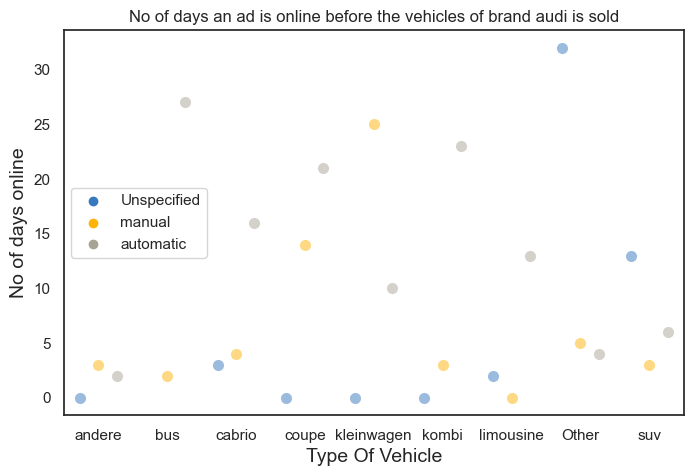

In [68]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
strip_plot = sns.stripplot(x="vehicleType", y="NoOfDaysOnline", hue="gearbox", dodge=True, data=frame, size=8, alpha=0.5, jitter=True)
ax.set_title("No of days an ad is online before the vehicles of brand " + search_term + " is sold")
ax.xaxis.set_label_text("Type Of Vehicle", fontdict= {'size':14})
ax.yaxis.set_label_text("No of days online", fontdict= {'size':14})

# Create a dictionary mapping old labels to new labels
new_labels = {'manuell': 'manual', 'automatik': 'automatic'}

# Get the current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Replace labels
labels = [new_labels[label] if label in new_labels else label for label in labels]

# Set the legend again
ax.legend(handles, labels)

plt.show()

In [70]:
fig.savefig((abs_path + "/Plots/vehicletype-NoOfDaysOnline.png"))